# A origem dos Jogadores

*Importando as Bibliotecas*

In [93]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

### 1.Limpeza e Organização do Dataset

In [94]:
data = pd.read_csv('archive/male_players.csv',low_memory=False)

#### 1.1.Filtrando os dados relevantes para análises estatísticas

In [ ]:
# Verificando se existe valores nulos
display(data.isnull().sum())
display(data.info())

Como não existe valores nulos, não se faz necessária a limpeza.

In [ ]:
#Removendo dados que não são relevantes para nossa análise

columns_irrelevant = ["fifa_update","value_eur","wage_eur","age","height_cm","weight_kg","player_url",
                      "update_as_of", "short_name", "long_name", "player_positions",'potential',
                      "dob", "club_team_id", "club_name", "league_id", "league_name", "league_level", "club_position", "club_jersey_number",
                      "club_loaned_from", "club_joined_date", 
                      "club_contract_valid_until_year", "nationality_id", "nationality_name", "nation_team_id", "nation_position", "nation_jersey_number",
                      "preferred_foot", "weak_foot", "skill_moves", "international_reputation", "work_rate", "body_type", "real_face", 
                      "release_clause_eur", "player_tags", "player_traits","player_id"]

players_attributes = data.drop(columns=columns_irrelevant)
players_attributes

#### 1.2.Divindo o Dataset por categoria

Dividimos o Dataset por setores, escolhendo as habilidades que são mais relevantes para cada área.

##### 1.2.1.Categoria Defensiva

A categoria defensiva vai englobar o goleiro, os zagueiros, os laterais e os alas defensivos. 
Engloba os jogares responsáveis por defender e recuperar a posse da bola.

Para os laterais consideramos a velocidade como atributo mais importante. Para os zagueiros escolhemos a noção defensiva, pois sua responsabilidade defensiva é maior que a dos laterais.

No goleiro consideramos os reflexos como o maior impactante no desempenho.

In [98]:

defense_players = data.loc[data["player_positions"].isin(["GK", "CB", "LB", "RB","LWB","RWB"])]
defense_players = defense_players[["fifa_version", "player_positions", "short_name",
                                   "movement_sprint_speed","defending_marking_awareness","goalkeeping_reflexes","overall" ]]

defense_players

,fifa_version,player_positions,short_name,movement_sprint_speed,defending_marking_awareness,goalkeeping_reflexes,overall
6,24.0,GK,T. Courtois,52,20,93,90
9,24.0,GK,Alisson,49,15,89,89
11,24.0,CB,Rúben Dias,69,91,12,89
13,24.0,GK,M. ter Stegen,50,25,91,89
15,24.0,CB,V. van Dijk,87,90,11,89
...,...,...,...,...,...,...,...
180011,15.0,GK,B. Richardson,25,25,31,43
180013,15.0,GK,L. Pilling,41,25,45,42
180015,15.0,GK,S. Ramsbottom,40,25,44,42
180016,15.0,CB,E. Redman,66,38,6,41


##### 1.2.2.Categoria de Meio-Campo

 A categoria Meio-Campo vai englobar os meia-centrais, os volantes, os meia-abertas e os meia-atacantes.
 Engloba os jogares responsáveis pelo jogo rodar.

Para os volantes, meia-centrais e meia-atacantes consideramos o passe curto o atributo mais importante, já que são os maiores responsáveis por essa função. 

Para os meia-abertos escolhemos o drible pois, assim como os pontas, eles fazem mais jogadas individuais.

In [101]:
midfield_players = data.loc[data["player_positions"].isin(["CDM", "LM", "RM", "CM","CAM"])]
midfield_players = midfield_players[["fifa_version", "player_positions", "short_name",
                                   "attacking_short_passing","dribbling","overall"]]

midfield_players

,fifa_version,player_positions,short_name,attacking_short_passing,dribbling,overall
14,24.0,CDM,Casemiro,84,73.0,89
33,24.0,CM,L. Modrić,91,87.0,87
37,24.0,CM,Pedri,88,88.0,86
45,24.0,CM,N. Barella,86,85.0,86
60,24.0,CM,S. Milinković-Savić,86,82.0,86
...,...,...,...,...,...,...
179995,15.0,CM,A. Murdoch,40,57.0,45
179999,15.0,CM,G. Casey,50,46.0,45
180003,15.0,CM,K. Nasser,52,48.0,45
180006,15.0,CM,T. Smith,54,44.0,44


##### 1.2.3.Categoria Ataque

A categoria Ataque engloba os jogadores encarregados de finalizar as jogadas. Sendo eles os pontas, centroavantes e segundo-atacantes.

Para os pontas, escolhemos o drible pois, assim como os meia-abertos, eles fazem mais jogadas individuais.

Para os centroavantes e segundo-atacantes escolhemos a finalização, porque têm como papel principal finalizar as jogadas, ou seja, fazer o gol.

In [102]:
attack_players = data.loc[data["player_positions"].isin(["LW", "ST", "RW", "CF"])]
attack_players = attack_players[["fifa_version", "player_positions", "short_name",
                                   "attacking_finishing","dribbling", "overall"]]

attack_players

,fifa_version,player_positions,short_name,attacking_finishing,dribbling,overall
1,24.0,ST,E. Haaland,96,80.0,91
5,24.0,ST,R. Lewandowski,93,87.0,90
7,24.0,ST,H. Kane,95,83.0,90
8,24.0,LW,Vini Jr.,89,90.0,89
12,24.0,LW,Neymar Jr,83,93.0,89
...,...,...,...,...,...,...
179938,15.0,ST,C. O'Connor,51,44.0,47
179949,15.0,ST,M. Bloomfield,48,50.0,47
179967,15.0,ST,S. Austin,48,48.0,46
179996,15.0,ST,A. Peterson,29,53.0,45


#### 1.3 Exploração Inicial.

Iremos calcular medidas de centralidade e dispersão categoria por categoria, analisando por ano e pegando a posição do jogador e sua categoria mais importante.

##### 1.3.1.Categoria Defensiva

 Versão Fifa 15 - Laterais
count    1195.000000
mean       71.450209
std         9.382250
min        29.000000
25%        66.000000
50%        72.000000
75%        78.000000
max        93.000000
Name: movement_sprint_speed, dtype: float64


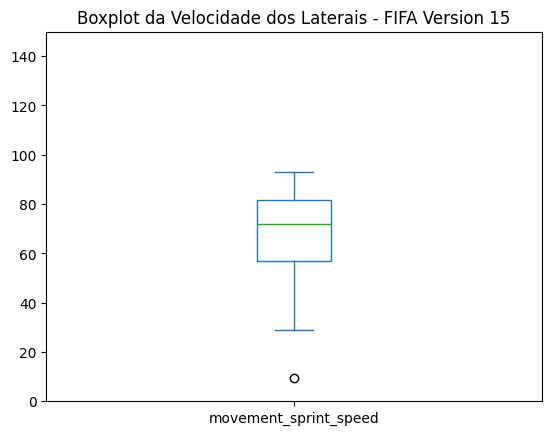

 Versão Fifa 16 - Laterais
count    1353.000000
mean       72.070953
std         8.621186
min        30.000000
25%        67.000000
50%        73.000000
75%        78.000000
max        94.000000
Name: movement_sprint_speed, dtype: float64


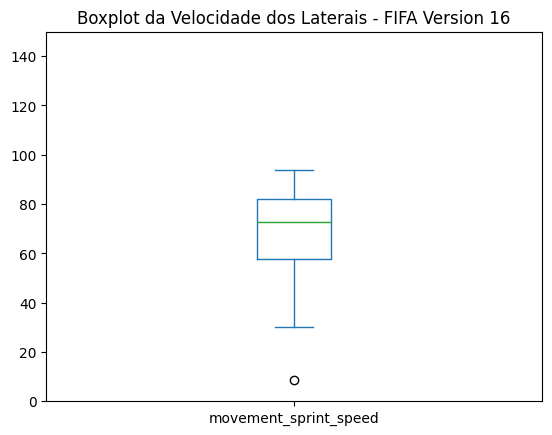

 Versão Fifa 17 - Laterais
count    1545.000000
mean       72.189644
std         8.727578
min        34.000000
25%        67.000000
50%        73.000000
75%        78.000000
max        94.000000
Name: movement_sprint_speed, dtype: float64


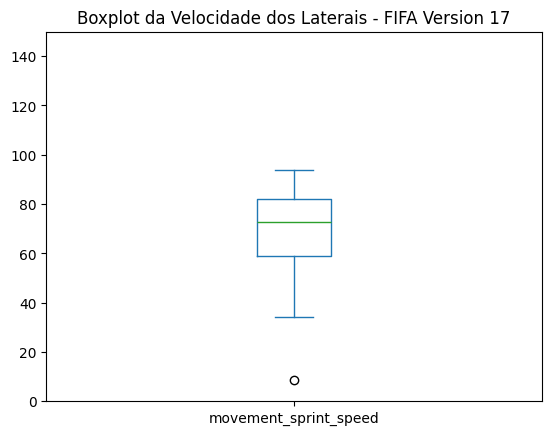

 Versão Fifa 18 - Laterais
count    1410.000000
mean       72.263830
std         8.520999
min        36.000000
25%        67.000000
50%        73.000000
75%        78.000000
max        94.000000
Name: movement_sprint_speed, dtype: float64


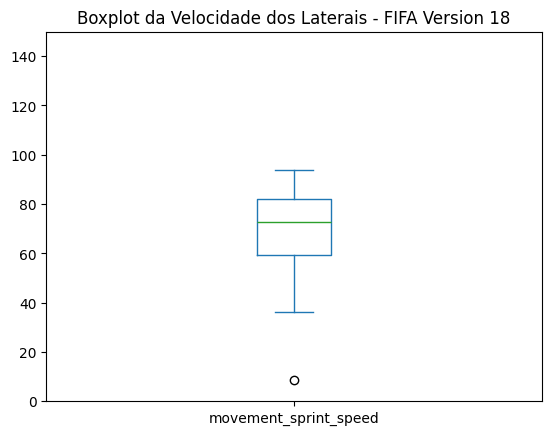

 Versão Fifa 19 - Laterais
count    1264.000000
mean       72.247627
std         8.355118
min        39.000000
25%        67.000000
50%        73.000000
75%        78.000000
max        94.000000
Name: movement_sprint_speed, dtype: float64


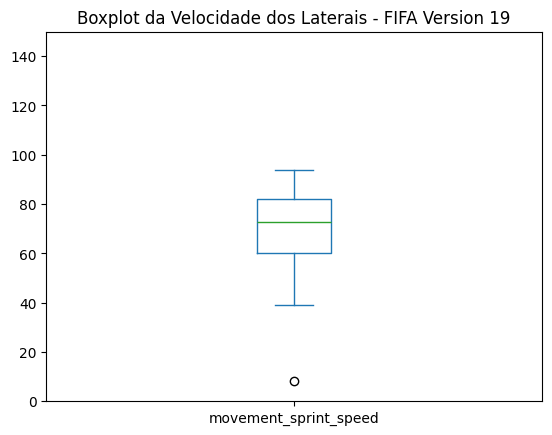

 Versão Fifa 20 - Laterais
count    1308.000000
mean       72.428135
std         8.022646
min        44.000000
25%        68.000000
50%        73.000000
75%        78.000000
max        94.000000
Name: movement_sprint_speed, dtype: float64


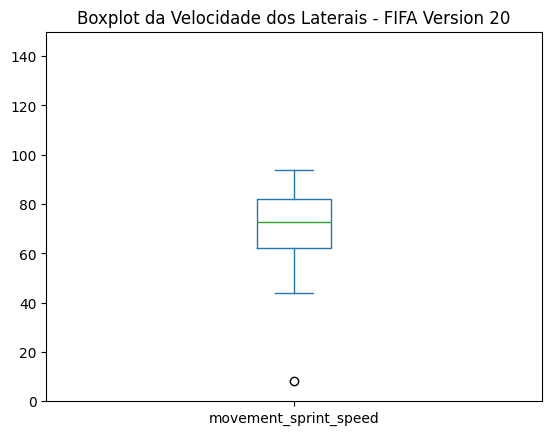

 Versão Fifa 21 - Laterais
count    1457.000000
mean       71.779684
std         8.097291
min        39.000000
25%        67.000000
50%        72.000000
75%        77.000000
max        94.000000
Name: movement_sprint_speed, dtype: float64


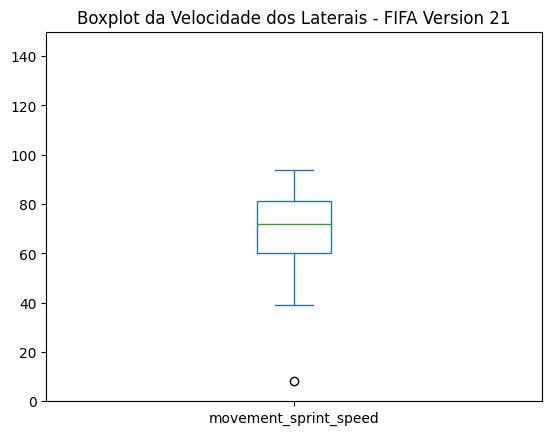

 Versão Fifa 22 - Laterais
count    1234.000000
mean       72.286062
std         7.952414
min        34.000000
25%        67.250000
50%        72.000000
75%        77.000000
max        94.000000
Name: movement_sprint_speed, dtype: float64


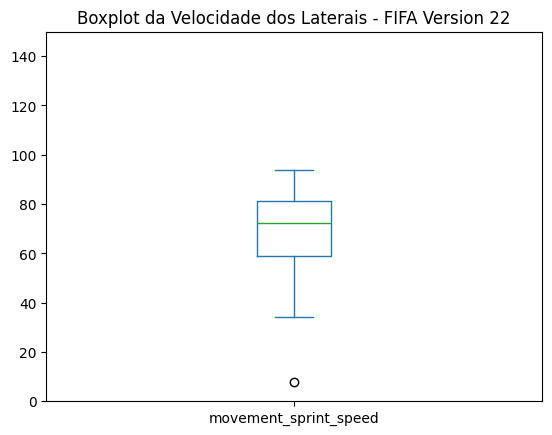

 Versão Fifa 23 - Laterais
count    1101.000000
mean       72.817439
std         7.932345
min        49.000000
25%        68.000000
50%        73.000000
75%        78.000000
max        94.000000
Name: movement_sprint_speed, dtype: float64


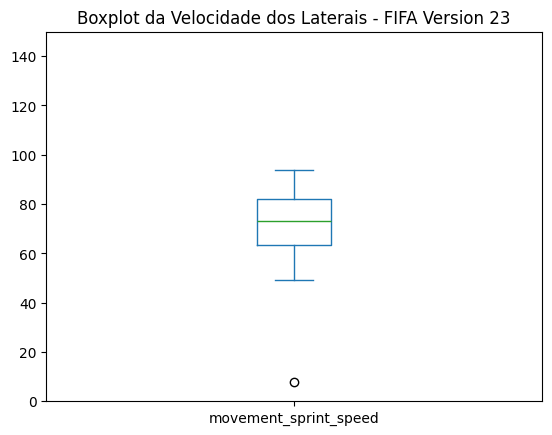

 Versão Fifa 24 - Laterais
count    969.000000
mean      72.216718
std        8.319951
min       42.000000
25%       67.000000
50%       72.000000
75%       78.000000
max       94.000000
Name: movement_sprint_speed, dtype: float64


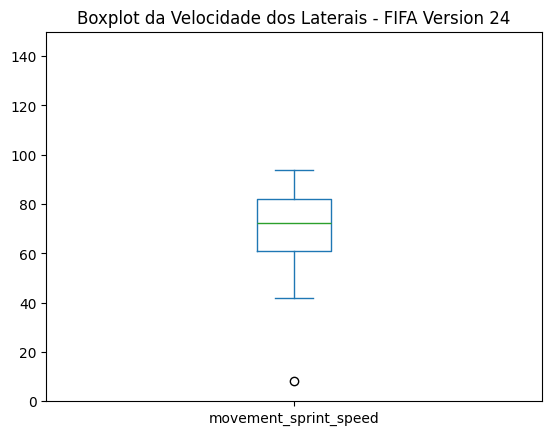

In [103]:
# For para calcular as medidas por ano e separando as posições por suas respectivas habilidades principais.
for i in range(15,25):
    fullbacks = defense_players[defense_players["player_positions"].isin(["LB", "RB", "LWB", "RWB"]) & (defense_players["fifa_version"] == i)]["movement_sprint_speed"].describe(exclude = defense_players["fifa_version"], include = None)
    print(f' Versão Fifa {i} - Laterais')
    print(fullbacks)
    fullbacks.plot(kind='box', title=f'Boxplot da Velocidade dos Laterais - FIFA Version {i}')
    plt.ylim(0,150)
    plt.show()

 Fifa Version 15
count    1855.000000
mean       64.219946
std         8.708087
min        36.000000
25%        58.000000
50%        64.000000
75%        70.000000
max        90.000000
Name: defending_marking_awareness, dtype: float64


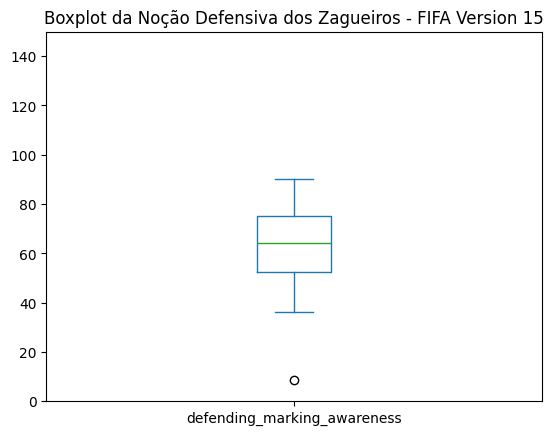

 Fifa Version 16
count    1992.000000
mean       67.306727
std         8.585072
min        41.000000
25%        62.000000
50%        67.000000
75%        74.000000
max        91.000000
Name: defending_marking_awareness, dtype: float64


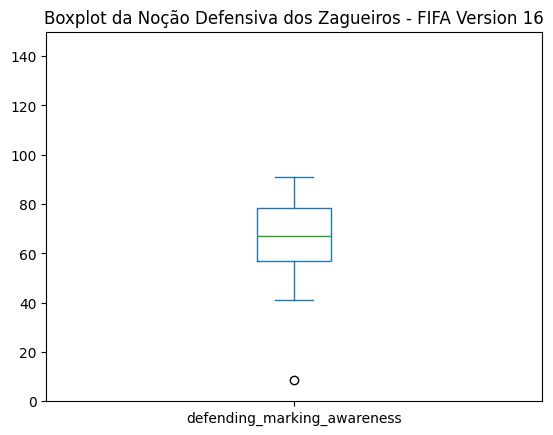

 Fifa Version 17
count    2175.000000
mean       66.192644
std         8.938517
min        38.000000
25%        61.000000
50%        66.000000
75%        72.000000
max        92.000000
Name: defending_marking_awareness, dtype: float64


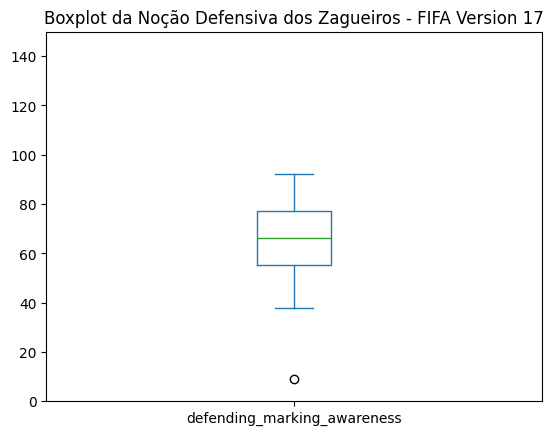

 Fifa Version 18
count    2214.000000
mean       65.945348
std         8.685924
min        37.000000
25%        61.000000
50%        66.000000
75%        72.000000
max        92.000000
Name: defending_marking_awareness, dtype: float64


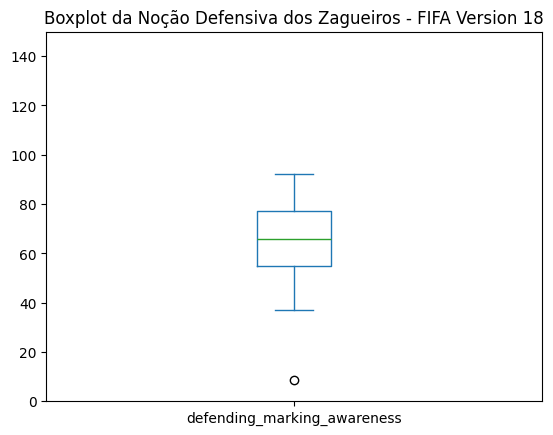

 Fifa Version 19
count    2240.000000
mean       65.341071
std         8.615436
min        40.000000
25%        60.000000
50%        65.000000
75%        71.000000
max        94.000000
Name: defending_marking_awareness, dtype: float64


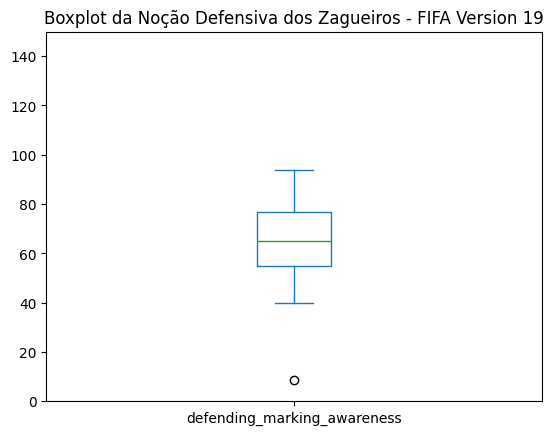

 Fifa Version 20
count    2343.000000
mean       65.184379
std         8.493287
min        38.000000
25%        60.000000
50%        65.000000
75%        71.000000
max        94.000000
Name: defending_marking_awareness, dtype: float64


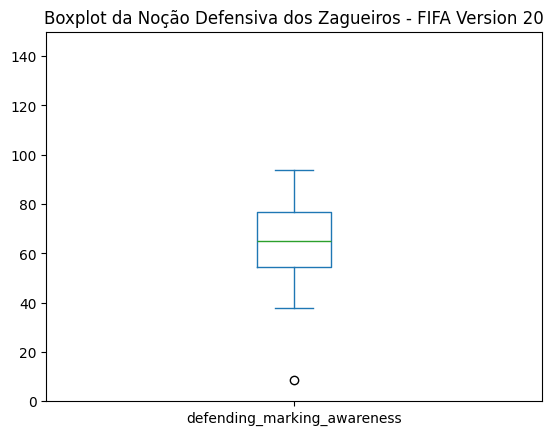

 Fifa Version 21
count    2430.000000
mean       64.834979
std         8.500910
min        36.000000
25%        60.000000
50%        65.000000
75%        71.000000
max        94.000000
Name: defending_marking_awareness, dtype: float64


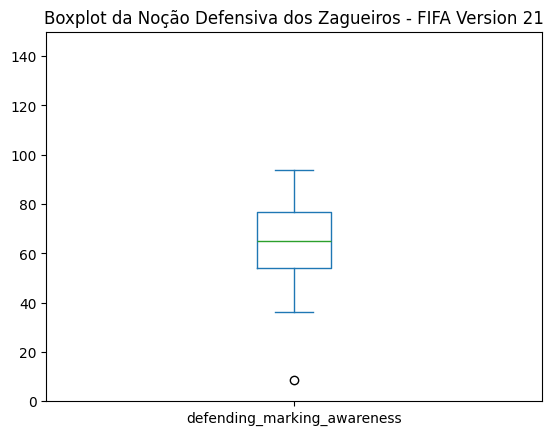

 Fifa Version 22
count    2423.000000
mean       65.368551
std         8.027921
min        50.000000
25%        60.000000
50%        65.000000
75%        70.000000
max        93.000000
Name: defending_marking_awareness, dtype: float64


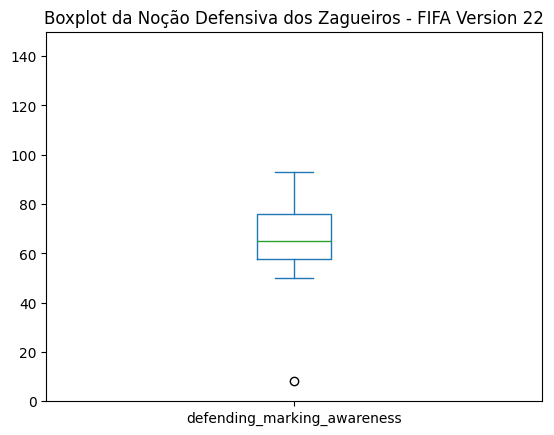

 Fifa Version 23
count    2422.000000
mean       65.798101
std         7.722154
min        50.000000
25%        61.000000
50%        66.000000
75%        70.000000
max        92.000000
Name: defending_marking_awareness, dtype: float64


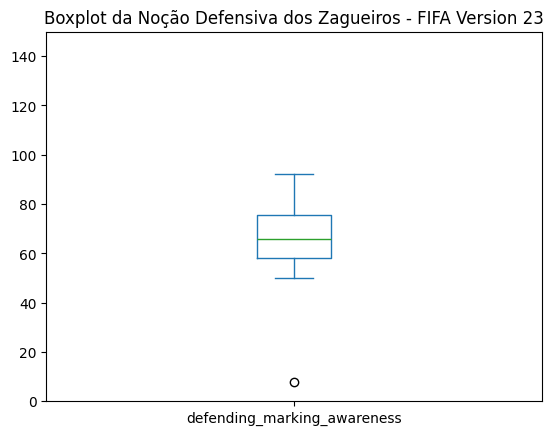

 Fifa Version 24
count    2385.000000
mean       65.914465
std         7.763453
min        50.000000
25%        60.000000
50%        66.000000
75%        71.000000
max        91.000000
Name: defending_marking_awareness, dtype: float64


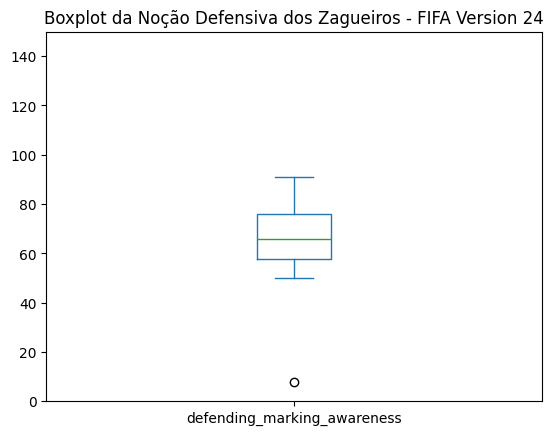

In [104]:
for i in range(15,25):
    centrebacks = defense_players[defense_players["player_positions"].isin(["CB"]) & (defense_players["fifa_version"] == i)]["defending_marking_awareness"].describe(exclude = defense_players["fifa_version"], include = None)
    print(f' Fifa Version {i}')
    print(centrebacks)
    
    centrebacks.plot(kind='box', title=f'Boxplot da Noção Defensiva dos Zagueiros - FIFA Version {i}')
    plt.ylim(0,150)
    plt.show()
 

 Fifa Version 15
count    1778.000000
mean       65.857143
std         8.314368
min        31.000000
25%        60.000000
50%        65.000000
75%        71.000000
max        90.000000
Name: goalkeeping_reflexes, dtype: float64


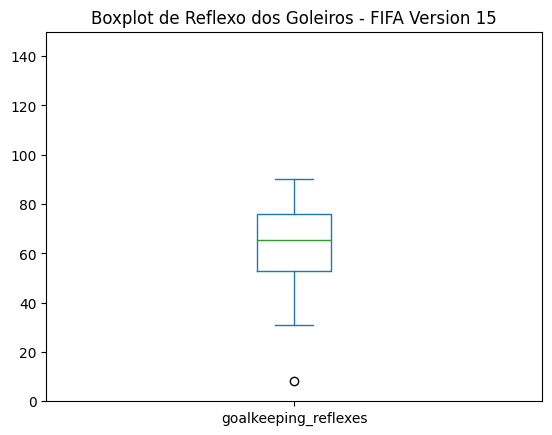

 Fifa Version 16
count    1825.000000
mean       67.340274
std         8.236289
min        32.000000
25%        62.000000
50%        67.000000
75%        73.000000
max        90.000000
Name: goalkeeping_reflexes, dtype: float64


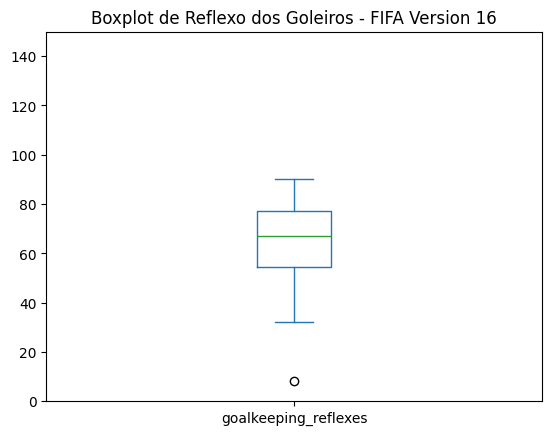

 Fifa Version 17
count    1993.000000
mean       65.494732
std         8.781604
min        33.000000
25%        59.000000
50%        65.000000
75%        72.000000
max        90.000000
Name: goalkeeping_reflexes, dtype: float64


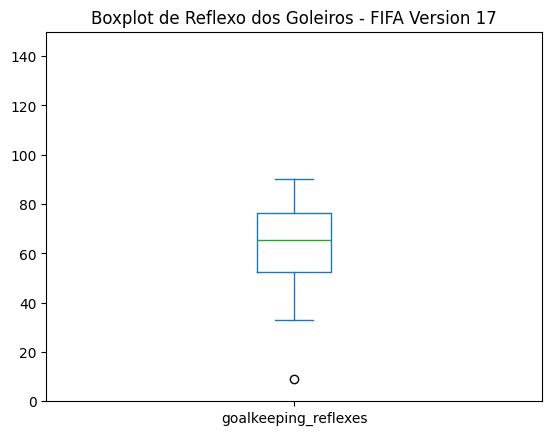

 Fifa Version 18
count    2019.000000
mean       66.230807
std         8.400011
min        37.000000
25%        60.000000
50%        66.000000
75%        72.000000
max        90.000000
Name: goalkeeping_reflexes, dtype: float64


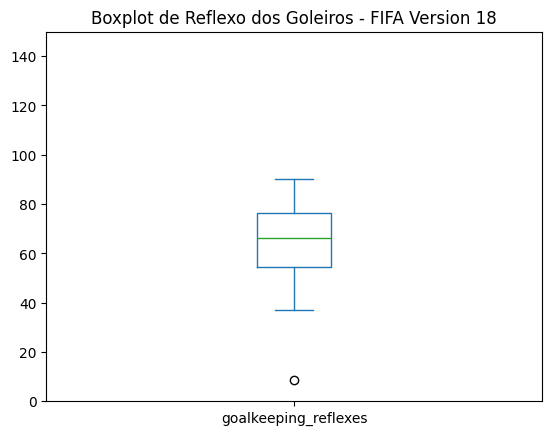

 Fifa Version 19
count    2029.000000
mean       66.050271
std         8.267617
min        45.000000
25%        60.000000
50%        66.000000
75%        72.000000
max        94.000000
Name: goalkeeping_reflexes, dtype: float64


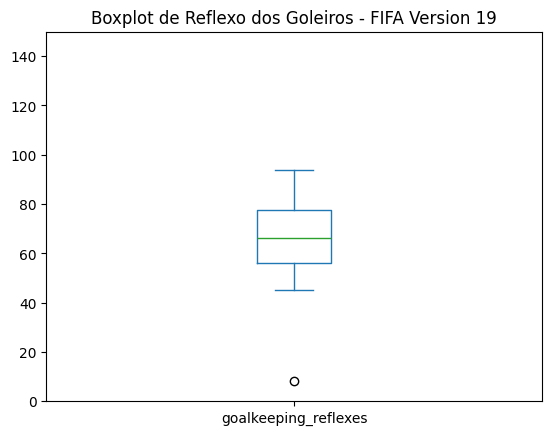

 Fifa Version 20
count    2061.000000
mean       66.325085
std         8.158151
min        45.000000
25%        60.000000
50%        66.000000
75%        72.000000
max        92.000000
Name: goalkeeping_reflexes, dtype: float64


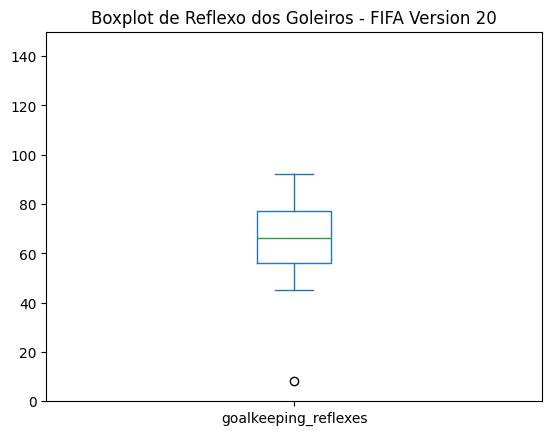

 Fifa Version 21
count    2076.000000
mean       66.096339
std         8.114860
min        44.000000
25%        60.000000
50%        66.000000
75%        71.000000
max        90.000000
Name: goalkeeping_reflexes, dtype: float64


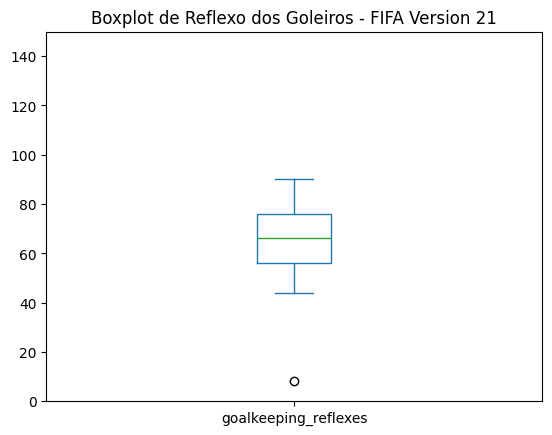

 Fifa Version 22
count    2132.000000
mean       65.924015
std         8.024706
min        45.000000
25%        60.000000
50%        66.000000
75%        72.000000
max        90.000000
Name: goalkeeping_reflexes, dtype: float64


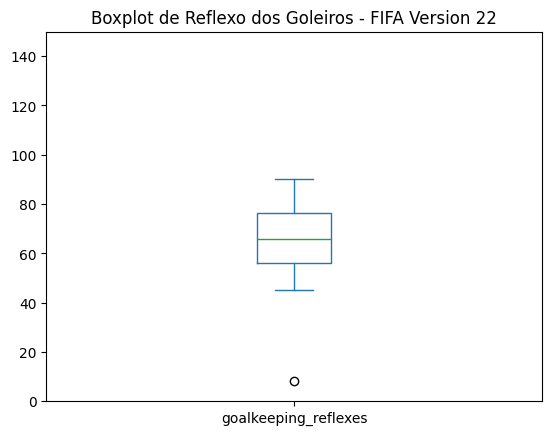

 Fifa Version 23
count    2066.000000
mean       65.957406
std         7.913340
min        45.000000
25%        60.000000
50%        66.000000
75%        71.000000
max        90.000000
Name: goalkeeping_reflexes, dtype: float64


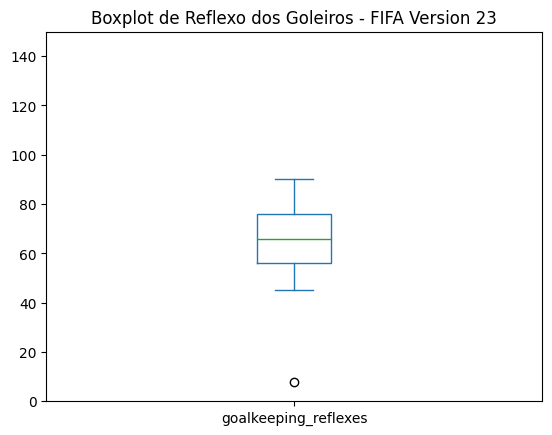

 Fifa Version 24
count    2045.000000
mean       65.714914
std         7.917468
min        45.000000
25%        60.000000
50%        65.000000
75%        71.000000
max        93.000000
Name: goalkeeping_reflexes, dtype: float64


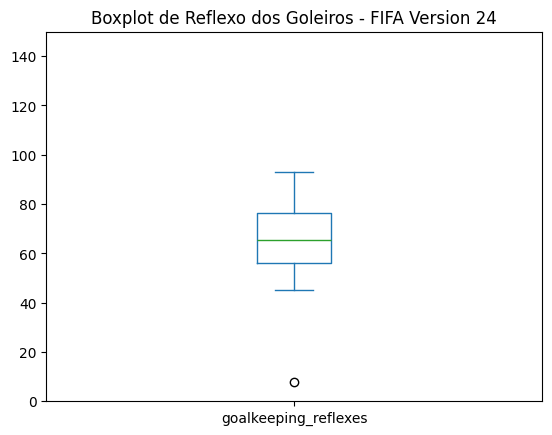

In [106]:
for i in range(15,25):
    goalkeepers = defense_players[defense_players["player_positions"].isin(["GK"]) & (defense_players["fifa_version"] == i)]["goalkeeping_reflexes"].describe(exclude = defense_players["fifa_version"], include = None)
    print(f' Fifa Version {i}')
    print(goalkeepers)

    goalkeepers.plot(kind='box', title=f'Boxplot de Reflexo dos Goleiros - FIFA Version {i}')
    plt.ylim(0,150)
    plt.show()

##### 1.3.2.Categoria Meio-Campo

Fifa Version 15
count    1461.000000
mean       65.570157
std         7.072039
min        40.000000
25%        61.000000
50%        66.000000
75%        70.000000
max        95.000000
Name: attacking_short_passing, dtype: float64


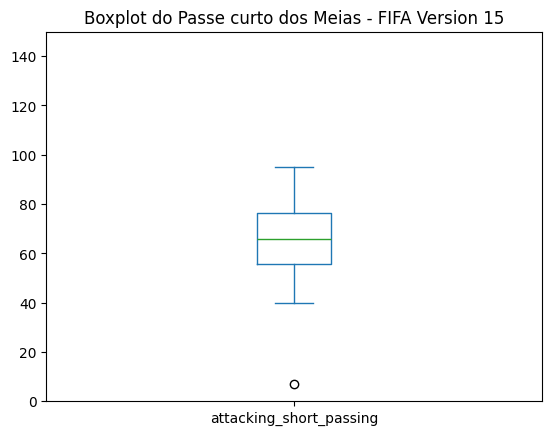

Fifa Version 16
count    1593.000000
mean       66.308851
std         7.216590
min        37.000000
25%        61.000000
50%        66.000000
75%        71.000000
max        92.000000
Name: attacking_short_passing, dtype: float64


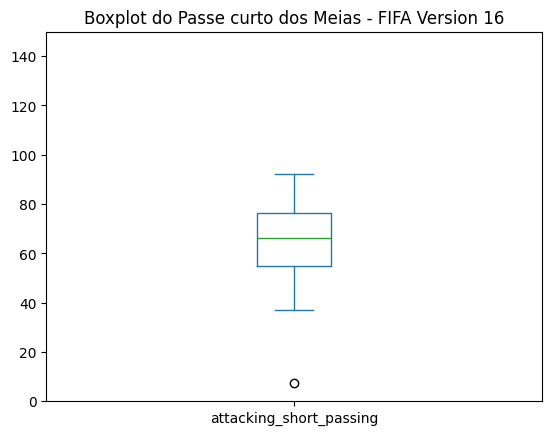

Fifa Version 17
count    1703.000000
mean       66.424545
std         7.135175
min        40.000000
25%        62.000000
50%        66.000000
75%        71.000000
max        92.000000
Name: attacking_short_passing, dtype: float64


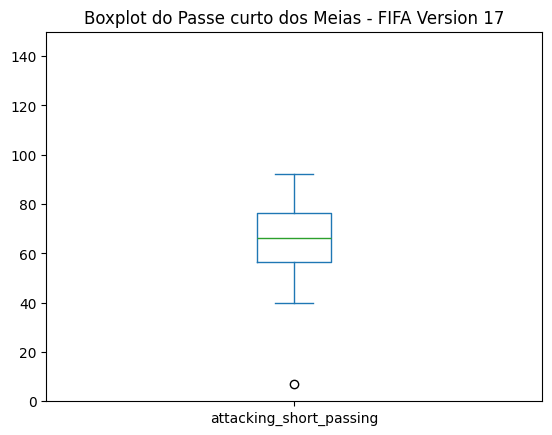

Fifa Version 18
count    1497.000000
mean       66.454242
std         7.010168
min        44.000000
25%        62.000000
50%        66.000000
75%        71.000000
max        88.000000
Name: attacking_short_passing, dtype: float64


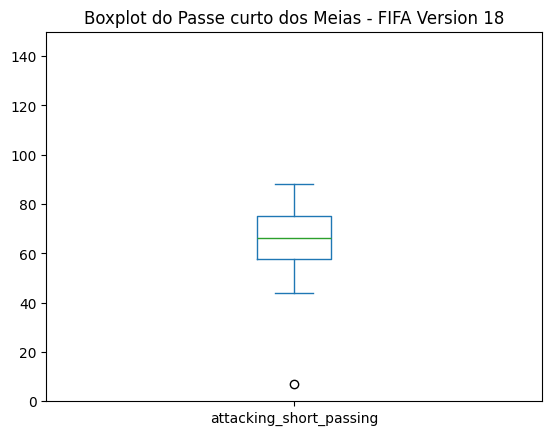

Fifa Version 19
count    1404.000000
mean       66.085470
std         7.131978
min        41.000000
25%        61.000000
50%        66.000000
75%        71.000000
max        89.000000
Name: attacking_short_passing, dtype: float64


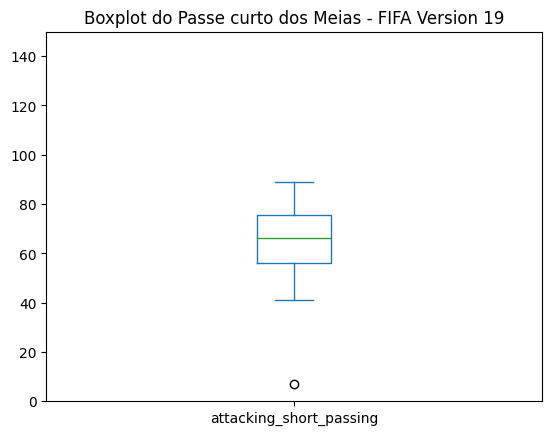

Fifa Version 20
count    1458.000000
mean       65.668038
std         7.058892
min        40.000000
25%        61.000000
50%        65.000000
75%        70.000000
max        92.000000
Name: attacking_short_passing, dtype: float64


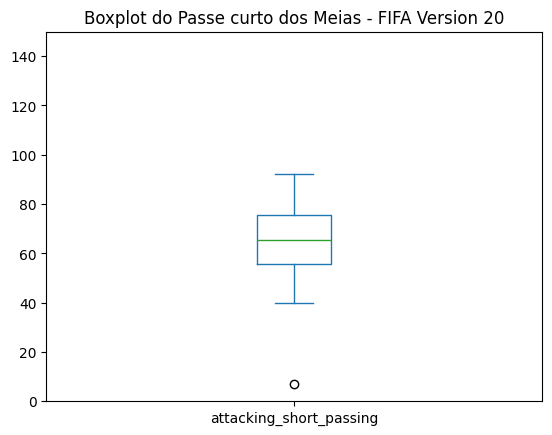

Fifa Version 21
count    1423.000000
mean       65.260014
std         7.338308
min        43.000000
25%        60.000000
50%        65.000000
75%        70.000000
max        93.000000
Name: attacking_short_passing, dtype: float64


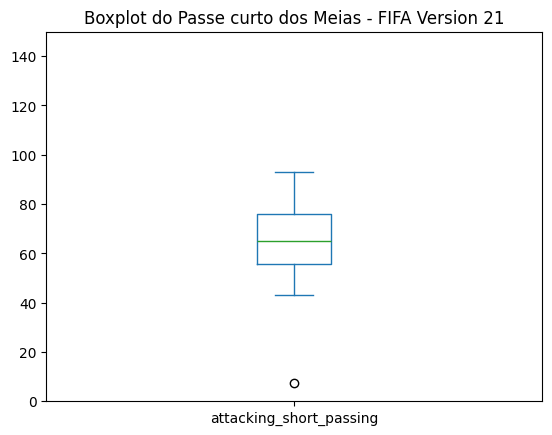

Fifa Version 22
count    1239.000000
mean       65.753834
std         7.200224
min        44.000000
25%        61.000000
50%        65.000000
75%        70.000000
max        93.000000
Name: attacking_short_passing, dtype: float64


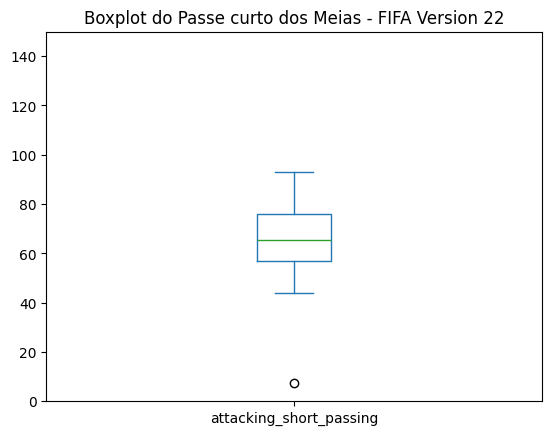

Fifa Version 23
count    1187.000000
mean       65.772536
std         7.531417
min        38.000000
25%        61.000000
50%        65.000000
75%        70.000000
max        93.000000
Name: attacking_short_passing, dtype: float64


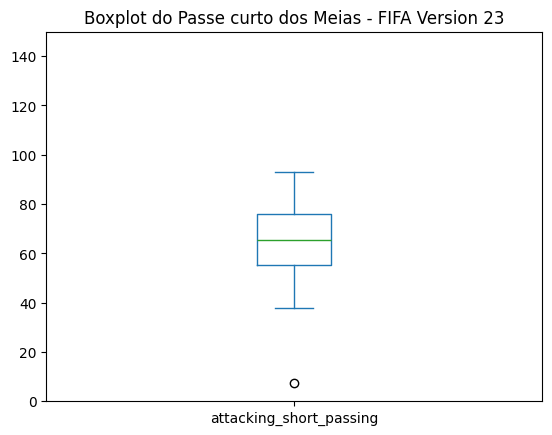

Fifa Version 24
count    1043.000000
mean       65.509108
std         7.017435
min        45.000000
25%        61.000000
50%        65.000000
75%        69.000000
max        91.000000
Name: attacking_short_passing, dtype: float64


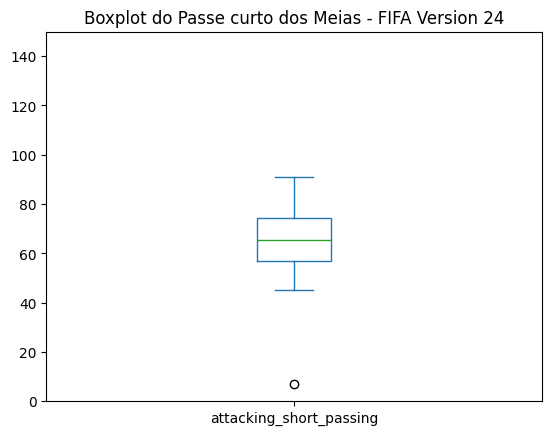

In [107]:
for i in range(15,25):
    meias = midfield_players[midfield_players["player_positions"].isin(["CM", "CDM", "CAM"]) & (midfield_players["fifa_version"] == i)]["attacking_short_passing"].describe(exclude = midfield_players["fifa_version"], include = None)
    print(f'Fifa Version {i}')
    print(meias)
    
    meias.plot(kind='box', title=f'Boxplot do Passe curto dos Meias - FIFA Version {i}')
    plt.ylim(0,150)
    plt.show()

Fifa Version 15
count    466.000000
mean      65.497854
std        7.703999
min       47.000000
25%       60.250000
50%       66.000000
75%       70.000000
max       92.000000
Name: dribbling, dtype: float64


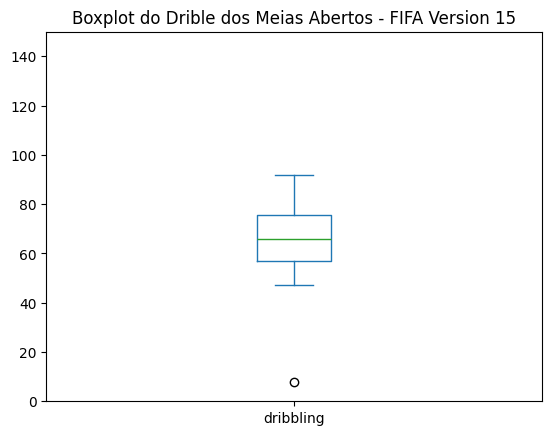

Fifa Version 16
count    477.000000
mean      65.742138
std        7.625599
min       45.000000
25%       61.000000
50%       65.000000
75%       71.000000
max       92.000000
Name: dribbling, dtype: float64


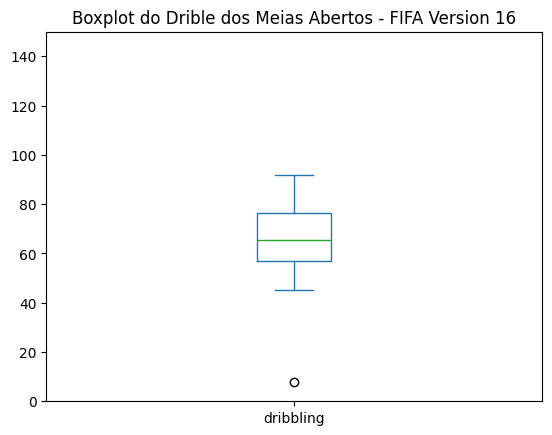

Fifa Version 17
count    582.000000
mean      66.218213
std        7.607100
min       45.000000
25%       61.000000
50%       66.000000
75%       71.000000
max       90.000000
Name: dribbling, dtype: float64


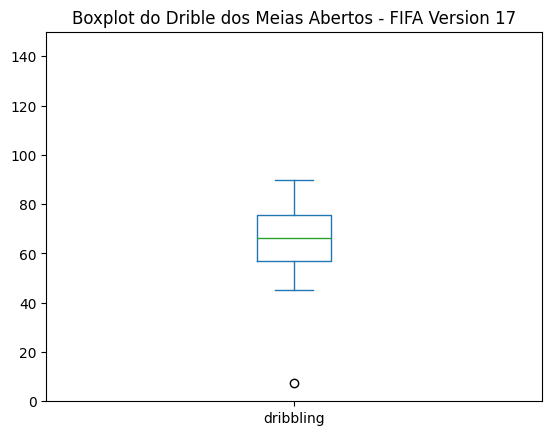

Fifa Version 18
count    554.000000
mean      65.949458
std        7.753968
min       45.000000
25%       61.000000
50%       66.000000
75%       71.000000
max       90.000000
Name: dribbling, dtype: float64


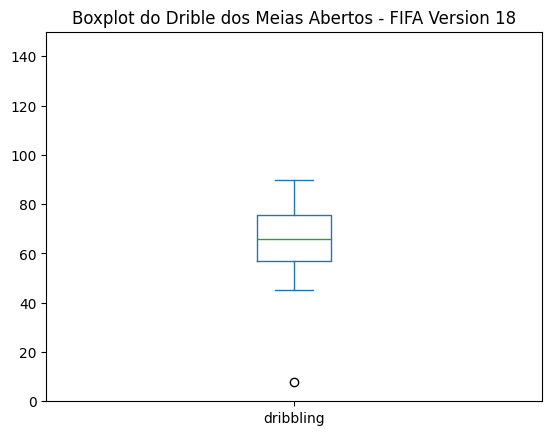

Fifa Version 19
count    523.000000
mean      65.707457
std        7.587831
min       47.000000
25%       61.000000
50%       66.000000
75%       70.000000
max       90.000000
Name: dribbling, dtype: float64


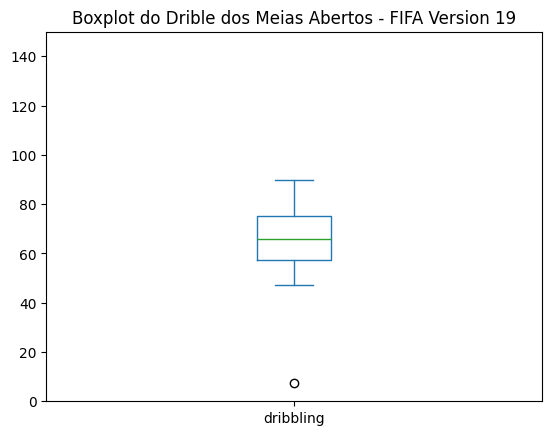

Fifa Version 20
count    480.000000
mean      66.189583
std        7.335922
min       46.000000
25%       61.000000
50%       66.000000
75%       71.000000
max       89.000000
Name: dribbling, dtype: float64


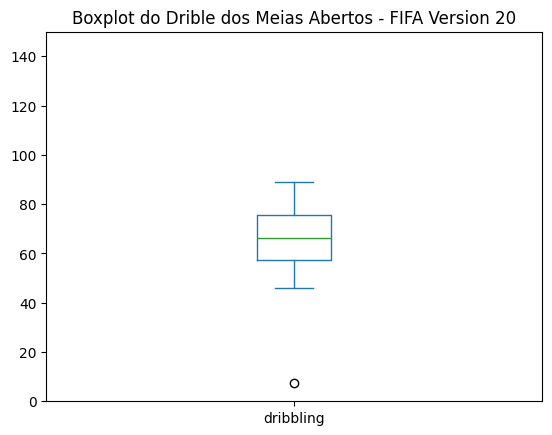

Fifa Version 21
count    531.000000
mean      66.721281
std        7.384424
min       49.000000
25%       62.000000
50%       66.000000
75%       71.000000
max       86.000000
Name: dribbling, dtype: float64


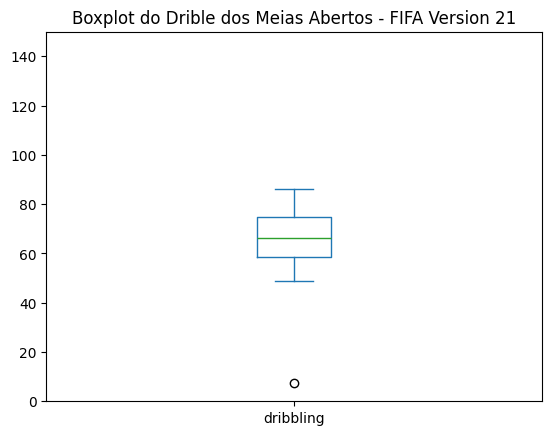

Fifa Version 22
count    402.000000
mean      64.557214
std        7.180811
min       47.000000
25%       60.000000
50%       64.000000
75%       69.000000
max       83.000000
Name: dribbling, dtype: float64


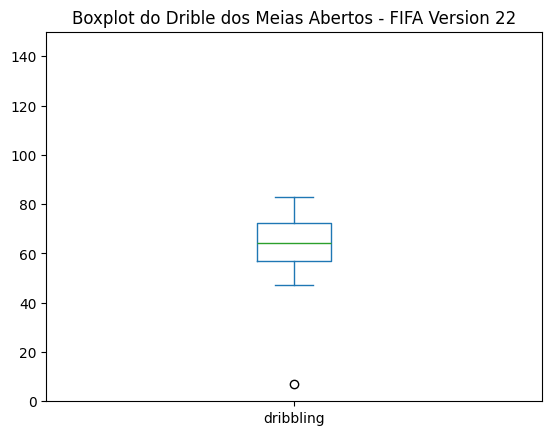

Fifa Version 23
count    337.000000
mean      65.014837
std        7.493435
min       46.000000
25%       60.000000
50%       65.000000
75%       70.000000
max       88.000000
Name: dribbling, dtype: float64


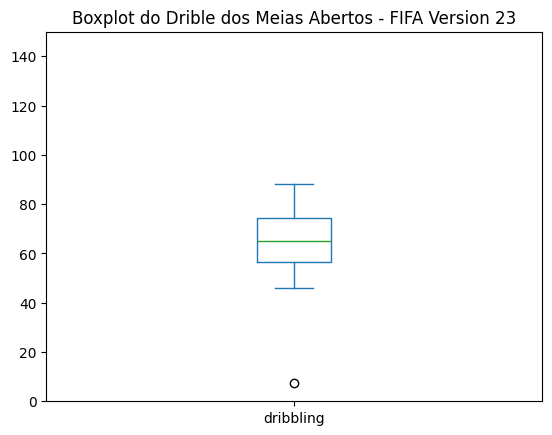

Fifa Version 24
count    319.000000
mean      64.843260
std        7.189738
min       46.000000
25%       60.000000
50%       65.000000
75%       69.000000
max       85.000000
Name: dribbling, dtype: float64


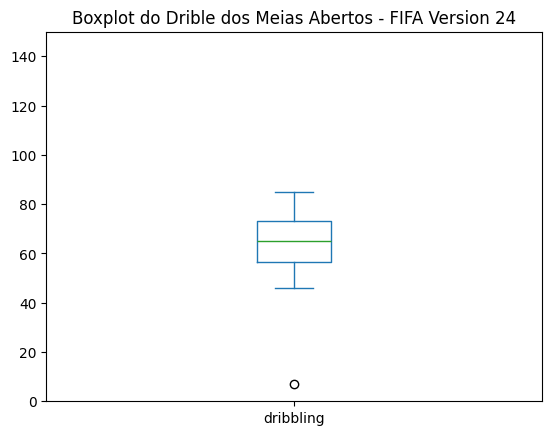

In [111]:
for i in range(15,25):
    meias_abertos = midfield_players[midfield_players["player_positions"].isin(["RM", "LM"]) & (midfield_players["fifa_version"] == i)]["dribbling"].describe(exclude = midfield_players["fifa_version"], include = None)
    print(f'Fifa Version {i}')
    print(meias_abertos)
    meias_abertos.plot(kind='box', title=f'Boxplot do Drible dos Meias Abertos - FIFA Version {i}')
    plt.ylim(0,150)
    plt.show()

##### 1.3.3. Categoria Ataque

 Fifa Version 15
count    194.000000
mean      68.097938
std        6.755209
min       51.000000
25%       64.000000
50%       68.000000
75%       73.000000
max       92.000000
Name: dribbling, dtype: float64


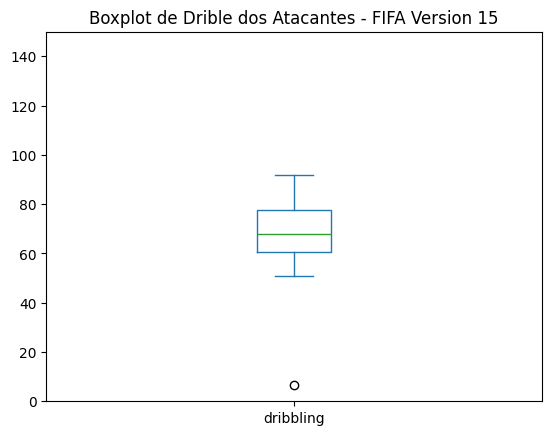

 Fifa Version 16
count    166.000000
mean      68.753012
std        7.460146
min       49.000000
25%       64.000000
50%       68.000000
75%       74.000000
max       92.000000
Name: dribbling, dtype: float64


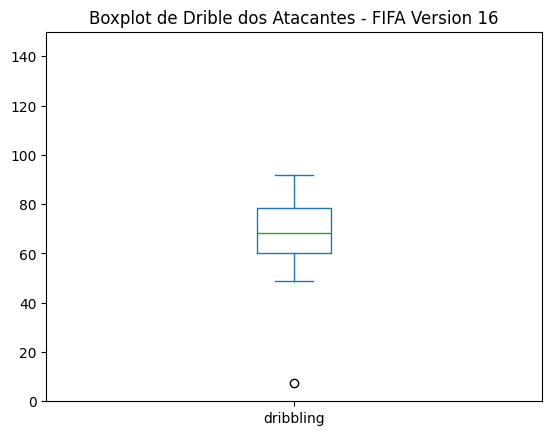

 Fifa Version 17
count    204.000000
mean      69.107843
std        8.226961
min       46.000000
25%       64.000000
50%       68.000000
75%       74.000000
max       96.000000
Name: dribbling, dtype: float64


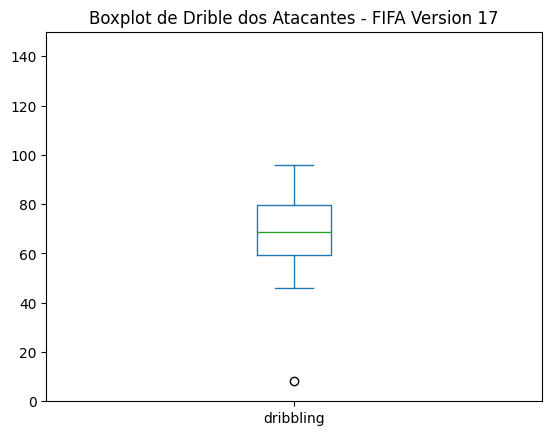

 Fifa Version 18
count    169.000000
mean      67.952663
std        8.765334
min       52.000000
25%       62.000000
50%       67.000000
75%       72.000000
max       96.000000
Name: dribbling, dtype: float64


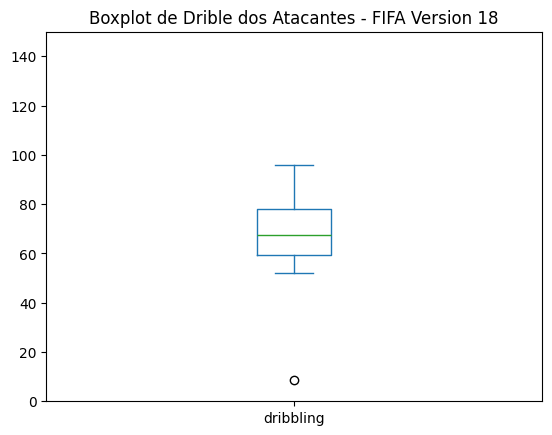

 Fifa Version 19
count    141.000000
mean      67.617021
std        8.329517
min       51.000000
25%       61.000000
50%       67.000000
75%       71.000000
max       95.000000
Name: dribbling, dtype: float64


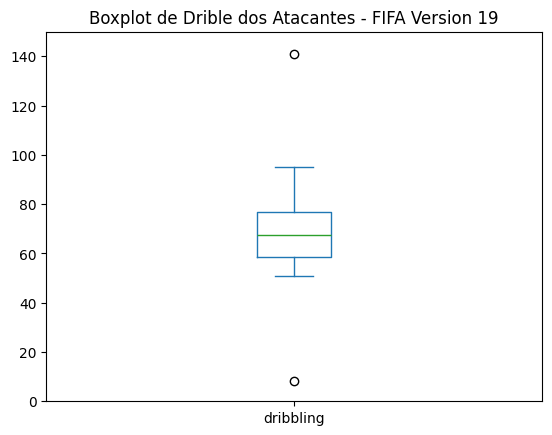

 Fifa Version 20
count    180.000000
mean      67.594444
std        7.816826
min       49.000000
25%       62.000000
50%       67.000000
75%       72.250000
max       86.000000
Name: dribbling, dtype: float64


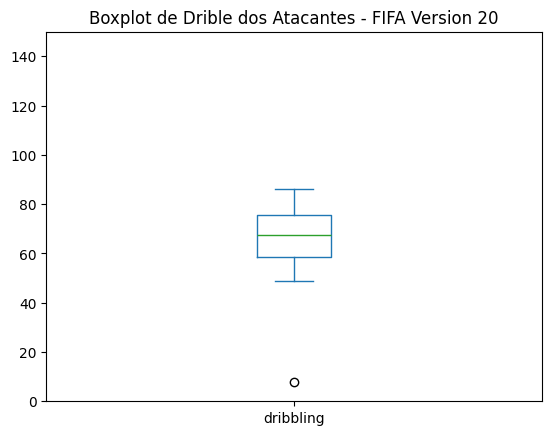

 Fifa Version 21
count    233.000000
mean      66.111588
std        8.177213
min       49.000000
25%       61.000000
50%       66.000000
75%       71.000000
max       90.000000
Name: dribbling, dtype: float64


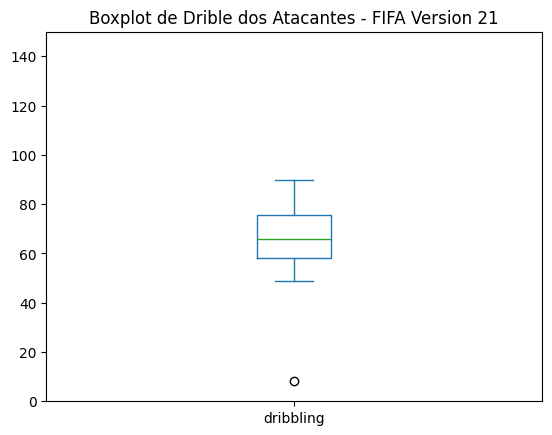

 Fifa Version 22
count    205.000000
mean      65.160976
std        7.969208
min       48.000000
25%       60.000000
50%       65.000000
75%       69.000000
max       90.000000
Name: dribbling, dtype: float64


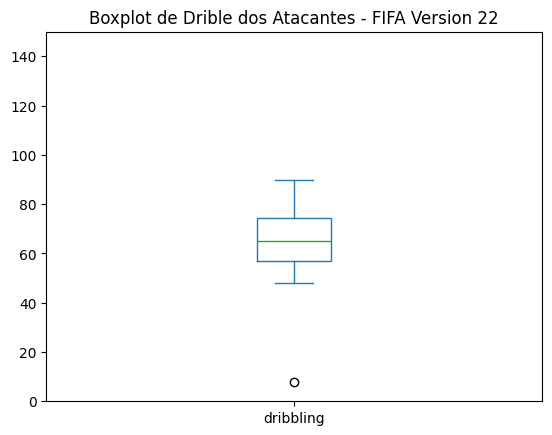

 Fifa Version 23
count    186.000000
mean      68.365591
std        8.755273
min       47.000000
25%       62.250000
50%       68.000000
75%       74.000000
max       94.000000
Name: dribbling, dtype: float64


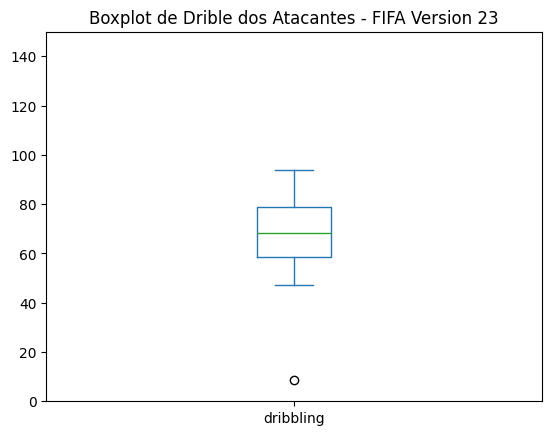

 Fifa Version 24
count    156.000000
mean      67.288462
std        8.261851
min       50.000000
25%       62.000000
50%       67.000000
75%       73.000000
max       93.000000
Name: dribbling, dtype: float64


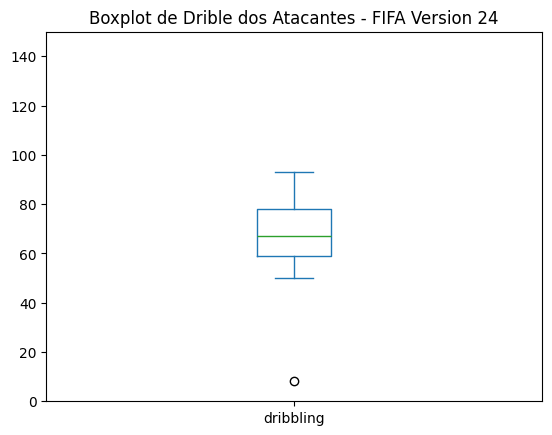

In [112]:
for i in range(15,25):
    pontas = attack_players[attack_players["player_positions"].isin(["LW","RW"]) & (attack_players["fifa_version"] == i)]["dribbling"].describe(exclude = attack_players["fifa_version"], include = None)
    print(f' Fifa Version {i}')
    print(pontas)

    pontas.plot(kind='box', title=f'Boxplot de Drible dos Atacantes - FIFA Version {i}')
    plt.ylim(0,150)
    plt.show()

 Fifa Version 15
count    1713.000000
mean       65.507881
std         7.861095
min        29.000000
25%        60.000000
50%        65.000000
75%        70.000000
max        94.000000
Name: attacking_finishing, dtype: float64


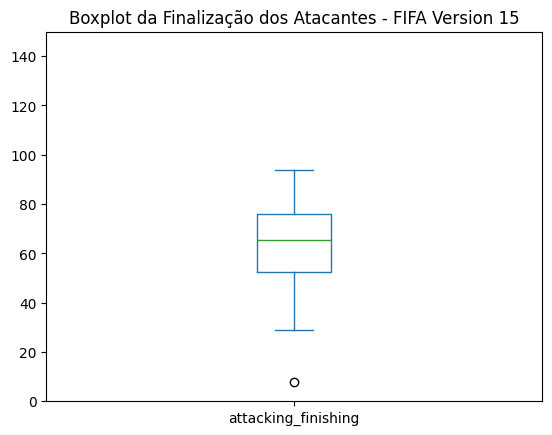

 Fifa Version 16
count    1818.000000
mean       66.543454
std         7.828271
min        33.000000
25%        61.000000
50%        66.000000
75%        72.000000
max        90.000000
Name: attacking_finishing, dtype: float64


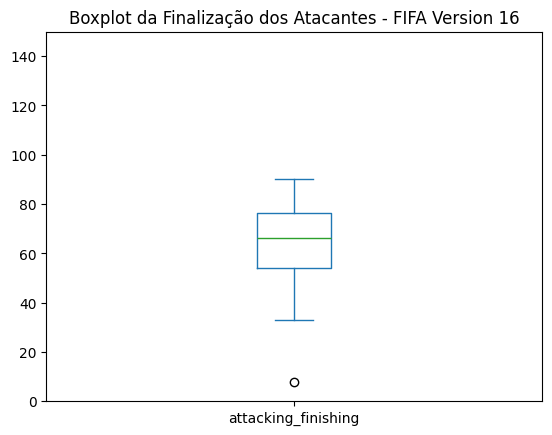

 Fifa Version 17
count    1875.000000
mean       66.649067
std         7.577528
min        38.000000
25%        62.000000
50%        66.000000
75%        72.000000
max        94.000000
Name: attacking_finishing, dtype: float64


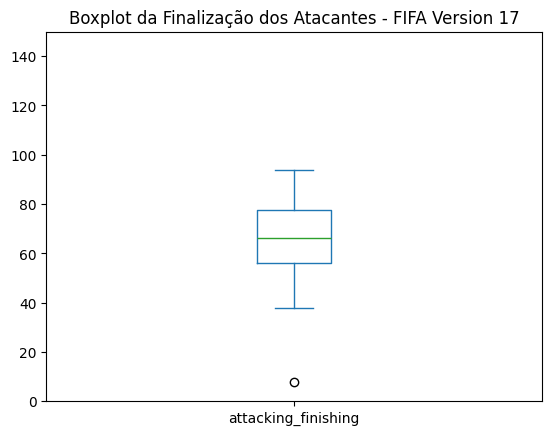

 Fifa Version 18
count    1862.000000
mean       66.913534
std         7.628078
min        46.000000
25%        62.000000
50%        66.000000
75%        72.000000
max        94.000000
Name: attacking_finishing, dtype: float64


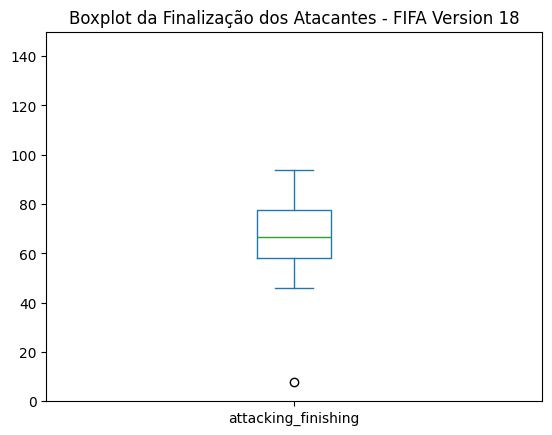

 Fifa Version 19
count    1840.000000
mean       66.925543
std         7.714692
min        40.000000
25%        62.000000
50%        67.000000
75%        72.000000
max        94.000000
Name: attacking_finishing, dtype: float64


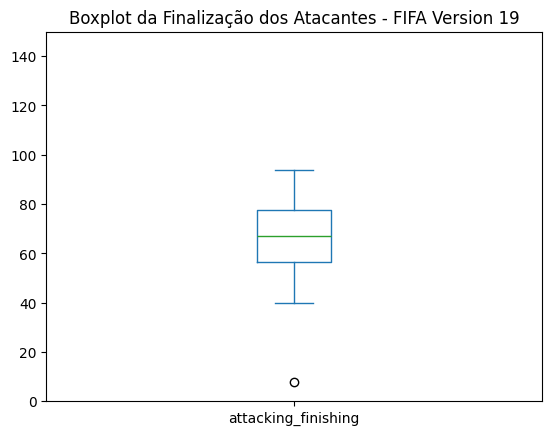

 Fifa Version 20
count    1845.000000
mean       67.073171
std         7.691416
min        44.000000
25%        62.000000
50%        67.000000
75%        72.000000
max        94.000000
Name: attacking_finishing, dtype: float64


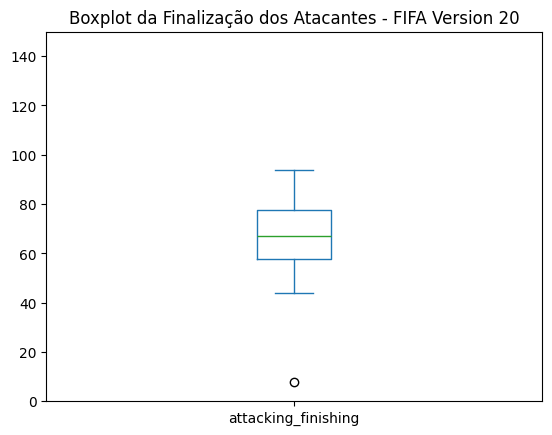

 Fifa Version 21
count    1904.000000
mean       67.185924
std         7.737013
min        44.000000
25%        62.000000
50%        67.000000
75%        72.000000
max        94.000000
Name: attacking_finishing, dtype: float64


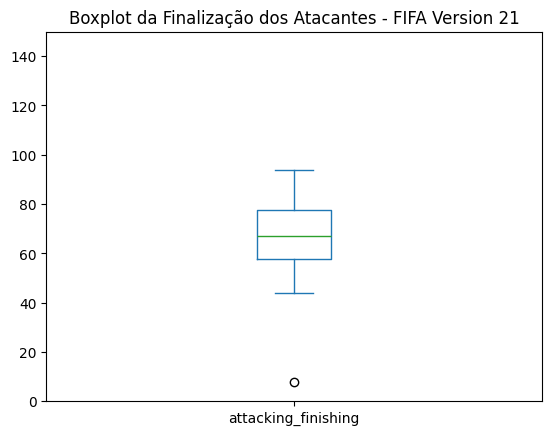

 Fifa Version 22
count    1795.000000
mean       67.538162
std         7.613802
min        44.000000
25%        62.000000
50%        67.000000
75%        73.000000
max        95.000000
Name: attacking_finishing, dtype: float64


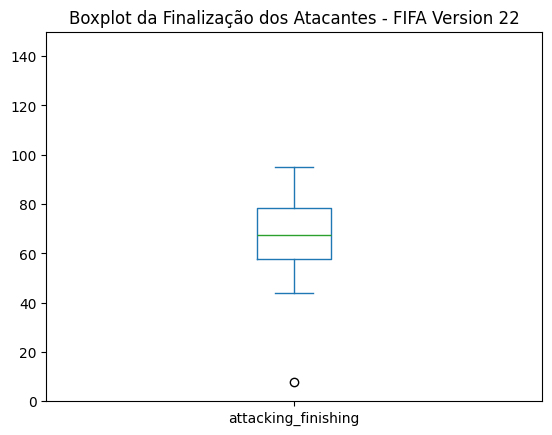

 Fifa Version 23
count    1734.000000
mean       67.584198
std         7.445637
min        42.000000
25%        62.250000
50%        67.000000
75%        72.000000
max        94.000000
Name: attacking_finishing, dtype: float64


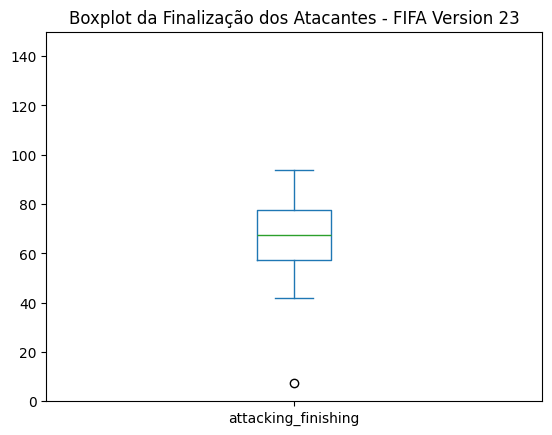

 Fifa Version 24
count    1664.000000
mean       67.449519
std         7.493503
min        45.000000
25%        63.000000
50%        67.000000
75%        73.000000
max        96.000000
Name: attacking_finishing, dtype: float64


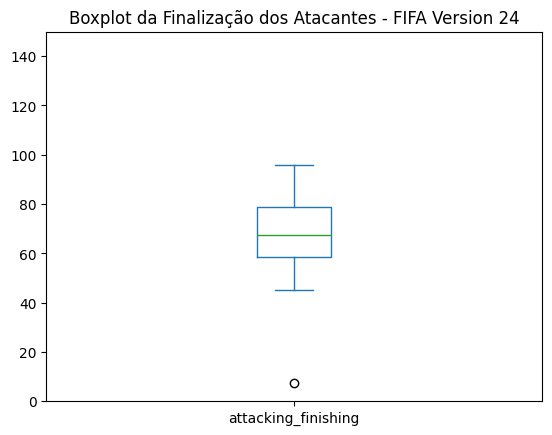

In [113]:
for i in range(15,25):
    centroavantes = attack_players[attack_players["player_positions"].isin(["ST","CF"]) & (attack_players["fifa_version"] == i)]["attacking_finishing"].describe(exclude = attack_players["fifa_version"], include = None)
    print(f' Fifa Version {i}')
    print(centroavantes)
    
    centroavantes.plot(kind='box', title=f'Boxplot da Finalização dos Atacantes - FIFA Version {i}')
    plt.ylim(0,150)
    plt.show()


#### 1.4.Visualização de Dados

##### 1.4.1 Análise de overall por setor

Visando comparar a média entre os setores, a fim de descobrir qual tem a maior média. 

In [127]:
# Pegando a médoa de overall por setor
media_defensores = np.mean(defense_players["overall"])
media_meias = np.mean(midfield_players["overall"])
media_atacantes = np.mean(attack_players["overall"])


setores = ['Defesa','Meio-Campo','Atacantes']
media_setor = [media_defensores,media_meias,media_atacantes]

<function matplotlib.pyplot.show(close=None, block=None)>

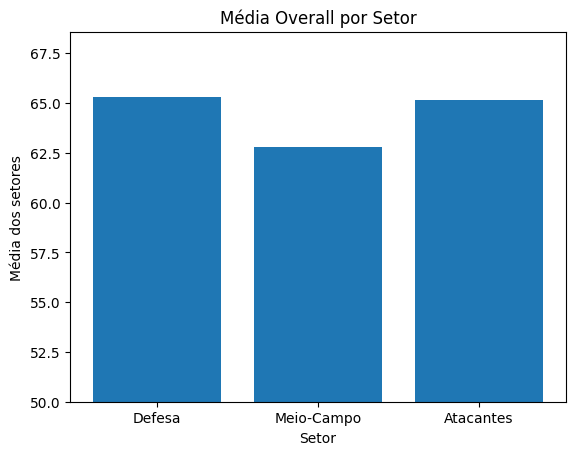

In [128]:
plt.bar(setores,media_setor)
plt.title('Média Overall por Setor')
plt.xlabel('Setor')
plt.ylabel('Média dos setores')
plt.ylim(50,None)
plt.show

Analisando esse gráfico, podemos observar que o setor defensivo possui a maior média de overall.

##### 1.4.2.Constancia entre os setores

In [ ]:
#Usar o short name do jogador
#passar o setor em ingles
def compare_players(player1, player2, setor, atribute):
    for i in range(15,25):
        player1 = setor_players[setor_players["short_name"].isin([player1]) & (attack_players["fifa_version"] == i)][atribute]
        player2 = setor_players[setor_players["short_name"].isin([player2]) & (attack_players["fifa_version"] == i)][atribute]
        np.mean(player1)
    plt.plot(x, y, marker='o', linestyle='-', color='b')
    plt.xlabel('Valores de X')
    plt.ylabel('Valores de Y')
    plt.title('Gráfico de comparação entre jogadores')
    plt.grid(True)
    plt.show()


##### 1.4.3.Comparando atributos de jogadores

In [143]:
#Criando a função para dado dois jogadores fazer a comparação entre eles
def compare_players(player1, player2, atribute):
    atributo_1 = []
    atributo_2 = []
    for i in range(15,25):
        player1 = data[data["short_name"].isin([player1]) & (data["fifa_version"] == i) & (data[atribute])]
        player2 = data[data["short_name"].isin([player2]) & (data["fifa_version"] == i) & (data[atribute])]
        atributo_1.append(player1[atribute])
        atributo_2.append(player2[atribute])
        
    
    plt.scatter(atributo_1, atributo_2)
    plt.xlabel(atribute ,'do', player1)
    plt.ylabel(atribute ,'do', player2)
    plt.title('Gráfico de Comparação')
    plt.show()


teste = compare_players("L.Messi", "C.Ronaldo", "attacking_finishing")
print(teste)

AttributeError: 'str' object has no attribute 'items'

Error in callback <function _draw_all_if_interactive at 0x000002B0A3EC4680> (for post_execute), with arguments args (),kwargs {}:


TypeError: float() argument must be a string or a real number, not 'DataFrame'

TypeError: float() argument must be a string or a real number, not 'DataFrame'

<Figure size 640x480 with 1 Axes>

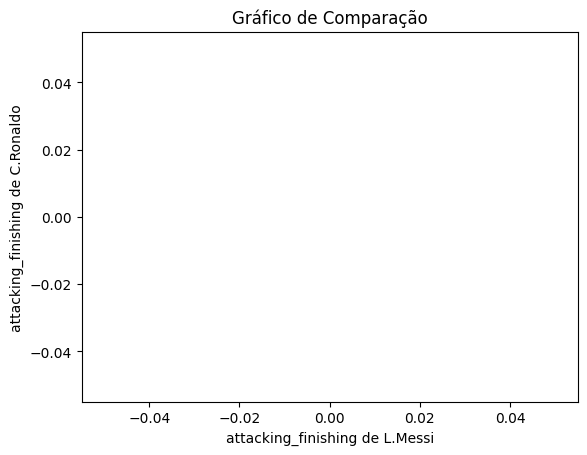

In [140]:
def compare_players(player1, player2, attribute):
    attribute_1 = []
    attribute_2 = []
    for i in range(15, 25):
        player1_data = data[(data["short_name"] == player1) & (data["fifa_version"] == i)][attribute].values
        player2_data = data[(data["short_name"] == player2) & (data["fifa_version"] == i)][attribute].values
        attribute_1.append(player1_data)
        attribute_2.append(player2_data)
    
    plt.scatter(attribute_1, attribute_2)
    plt.xlabel(f'{attribute} de {player1}')
    plt.ylabel(f'{attribute} de {player2}')
    plt.title('Gráfico de Comparação')
    plt.show()

compare_players("L.Messi", "C.Ronaldo", "attacking_finishing")